# Session 2: Hierarchical Clustering and DBSCAN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Accessing dataset

In [2]:
df=pd.read_excel('Allianz.xlsx',sheet_name=1)
df

Contract_number  Sex  Birth_year  Birth_month  End_age  Claim_year  \
0            42142935    1        1952            7       65        2004   
1            42142935    1        1952            7       65        2012   
2            71384115    1        1951            8       65        2008   
3            12246809    1        1953            8       65        2008   
4            14280764    2        1960            3       65        2016   
...               ...  ...         ...          ...      ...         ...   
5365         90704116    2        1959            7       60        1995   
5366         54117181    1        1947            2       65        1997   
5367         54117181    1        1947            2       65        2007   
5368         50550005    1        1952            6       65        2004   
5369         60296559    2        1959            7       60        1995   

      Claim_month  Pct_dis1  Pct_dis2  Pct_dis3  ...  Pct_dis17  Pct_dis18  \
0               6       1.0       1.0       1.0  ...        0.0        0.0   
1              11       0.8       0.0       0.0  ...        0.0        0.0   
2               7       0.5       0.0       0.0  ...        0.0        0.0   
3               7       1.0       1.0       1.0  ...        0.0        0.0   
4               1       1.0       0.0       0.0  ...        0.0        0.0   
...           ...       ...       ...       ...  ...        ...        ...   
5365            2       0.7       0.7       0.7  ...        0.0        0.0   
5366            9       1.0       1.0       1.0  ...        0.0        0.0   
5367            8       1.0       1.0       1.0  ...        0.0        0.0   
5368            7       0.8       0.0       0.0  ...        0.0        0.0   
5369            2       0.7       0.7       0.7  ...        0.0        0.0   

      Pct_dis19  Pct_dis20  Pct_dis21  Duration  Postalcode         District  \
0           0.0        0.0        0.0        12        1000         Brussels   
1           0.0        0.0        0.0         1        6800       Luxembourg   
2           0.0        0.0        0.0         1        6860       Luxembourg   
3           0.0        0.0        0.0        10        4140            Liege   
4           0.0        0.0        0.0         1        3000   Vlaams Brabant   
...         ...        ...        ...       ...         ...              ...   
5365        0.0        0.0        0.0        11        8670  West-Vlaanderen   
5366        0.0        0.0        0.0        15        2490        Antwerpen   
5367        0.0        0.0        0.0         5        2490        Antwerpen   
5368        0.0        0.0        0.0         1        8400  West-Vlaanderen   
5369        0.0        0.0        0.0        11        8670  West-Vlaanderen   

          Broker       Annuity  
0            NaN  9.648783e+09  
1            NaN  9.578540e+03  
2            NaN  1.298077e+04  
3     27531419.0  9.785032e+06  
4     58473276.0  3.434563e+04  
...          ...           ...  
5365  55454148.0  9.061200e+02  
5366  63356854.0  1.419268e+09  
5367  63356854.0  1.415608e+07  
5368  54120570.0  1.030900e+03  
5369  55454148.0  2.648640e+03  

[5370 rows x 33 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Contract_number  5370 non-null   int64  
 1   Sex              5370 non-null   int64  
 2   Birth_year       5370 non-null   int64  
 3   Birth_month      5370 non-null   int64  
 4   End_age          5370 non-null   int64  
 5   Claim_year       5370 non-null   int64  
 6   Claim_month      5370 non-null   int64  
 7   Pct_dis1         5370 non-null   float64
 8   Pct_dis2         5370 non-null   float64
 9   Pct_dis3         5370 non-null   float64
 10  Pct_dis4         5370 non-null   float64
 11  Pct_dis5         5370 non-null   float64
 12  Pct_dis6         5370 non-null   float64
 13  Pct_dis7         5370 non-null   float64
 14  Pct_dis8         5370 non-null   float64
 15  Pct_dis9         5370 non-null   float64
 16  Pct_dis10        5370 non-null   float64
 17  Pct_dis11     

## Preprocessing

In [4]:
df.columns

Index(['Contract_number', 'Sex', 'Birth_year', 'Birth_month', 'End_age',
       'Claim_year', 'Claim_month', 'Pct_dis1', 'Pct_dis2', 'Pct_dis3',
       'Pct_dis4', 'Pct_dis5', 'Pct_dis6', 'Pct_dis7', 'Pct_dis8', 'Pct_dis9',
       'Pct_dis10', 'Pct_dis11', 'Pct_dis12', 'Pct_dis13', 'Pct_dis14',
       'Pct_dis15', 'Pct_dis16', 'Pct_dis17', 'Pct_dis18', 'Pct_dis19',
       'Pct_dis20', 'Pct_dis21', 'Duration', 'Postalcode', 'District',
       'Broker', 'Annuity'],
      dtype='object')

In [6]:
df_1=df.drop(['Contract_number','Postalcode', 'District'],axis=1)
df_1

Sex  Birth_year  Birth_month  End_age  Claim_year  Claim_month  \
0       1        1952            7       65        2004            6   
1       1        1952            7       65        2012           11   
2       1        1951            8       65        2008            7   
3       1        1953            8       65        2008            7   
4       2        1960            3       65        2016            1   
...   ...         ...          ...      ...         ...          ...   
5365    2        1959            7       60        1995            2   
5366    1        1947            2       65        1997            9   
5367    1        1947            2       65        2007            8   
5368    1        1952            6       65        2004            7   
5369    2        1959            7       60        1995            2   

      Pct_dis1  Pct_dis2  Pct_dis3  Pct_dis4  ...  Pct_dis15  Pct_dis16  \
0          1.0       1.0       1.0       1.0  ...        0.0        0.0   
1          0.8       0.0       0.0       0.0  ...        0.0        0.0   
2          0.5       0.0       0.0       0.0  ...        0.0        0.0   
3          1.0       1.0       1.0       1.0  ...        0.0        0.0   
4          1.0       0.0       0.0       0.0  ...        0.0        0.0   
...        ...       ...       ...       ...  ...        ...        ...   
5365       0.7       0.7       0.7       0.7  ...        0.0        0.0   
5366       1.0       1.0       1.0       1.0  ...        0.3        0.0   
5367       1.0       1.0       1.0       1.0  ...        0.0        0.0   
5368       0.8       0.0       0.0       0.0  ...        0.0        0.0   
5369       0.7       0.7       0.7       0.7  ...        0.0        0.0   

      Pct_dis17  Pct_dis18  Pct_dis19  Pct_dis20  Pct_dis21  Duration  \
0           0.0        0.0        0.0        0.0        0.0        12   
1           0.0        0.0        0.0        0.0        0.0         1   
2           0.0        0.0        0.0        0.0        0.0         1   
3           0.0        0.0        0.0        0.0        0.0        10   
4           0.0        0.0        0.0        0.0        0.0         1   
...         ...        ...        ...        ...        ...       ...   
5365        0.0        0.0        0.0        0.0        0.0        11   
5366        0.0        0.0        0.0        0.0        0.0        15   
5367        0.0        0.0        0.0        0.0        0.0         5   
5368        0.0        0.0        0.0        0.0        0.0         1   
5369        0.0        0.0        0.0        0.0        0.0        11   

          Broker       Annuity  
0            NaN  9.648783e+09  
1            NaN  9.578540e+03  
2            NaN  1.298077e+04  
3     27531419.0  9.785032e+06  
4     58473276.0  3.434563e+04  
...          ...           ...  
5365  55454148.0  9.061200e+02  
5366  63356854.0  1.419268e+09  
5367  63356854.0  1.415608e+07  
5368  54120570.0  1.030900e+03  
5369  55454148.0  2.648640e+03  

[5370 rows x 30 columns]

In [7]:
df_2=df_1.dropna()
df_2

Sex  Birth_year  Birth_month  End_age  Claim_year  Claim_month  \
3       1        1953            8       65        2008            7   
4       2        1960            3       65        2016            1   
5       1        1970            6       65        2003            8   
6       1        1975            3       65        2006           11   
7       1        1965            4       65        2013           12   
...   ...         ...          ...      ...         ...          ...   
5365    2        1959            7       60        1995            2   
5366    1        1947            2       65        1997            9   
5367    1        1947            2       65        2007            8   
5368    1        1952            6       65        2004            7   
5369    2        1959            7       60        1995            2   

      Pct_dis1  Pct_dis2  Pct_dis3  Pct_dis4  ...  Pct_dis15  Pct_dis16  \
3          1.0       1.0       1.0       1.0  ...        0.0        0.0   
4          1.0       0.0       0.0       0.0  ...        0.0        0.0   
5          1.0       1.0       1.0       0.5  ...        0.0        0.0   
6          0.8       0.0       0.0       0.0  ...        0.0        0.0   
7          1.0       1.0       0.8       0.0  ...        0.0        0.0   
...        ...       ...       ...       ...  ...        ...        ...   
5365       0.7       0.7       0.7       0.7  ...        0.0        0.0   
5366       1.0       1.0       1.0       1.0  ...        0.3        0.0   
5367       1.0       1.0       1.0       1.0  ...        0.0        0.0   
5368       0.8       0.0       0.0       0.0  ...        0.0        0.0   
5369       0.7       0.7       0.7       0.7  ...        0.0        0.0   

      Pct_dis17  Pct_dis18  Pct_dis19  Pct_dis20  Pct_dis21  Duration  \
3           0.0        0.0        0.0        0.0        0.0        10   
4           0.0        0.0        0.0        0.0        0.0         1   
5           0.0        0.0        0.0        0.0        0.0         4   
6           0.0        0.0        0.0        0.0        0.0         1   
7           0.0        0.0        0.0        0.0        0.0         3   
...         ...        ...        ...        ...        ...       ...   
5365        0.0        0.0        0.0        0.0        0.0        11   
5366        0.0        0.0        0.0        0.0        0.0        15   
5367        0.0        0.0        0.0        0.0        0.0         5   
5368        0.0        0.0        0.0        0.0        0.0         1   
5369        0.0        0.0        0.0        0.0        0.0        11   

          Broker       Annuity  
3     27531419.0  9.785032e+06  
4     58473276.0  3.434563e+04  
5     18022445.0  6.544400e+03  
6     70581157.0  2.563686e+04  
7     44579296.0  3.576280e+03  
...          ...           ...  
5365  55454148.0  9.061200e+02  
5366  63356854.0  1.419268e+09  
5367  63356854.0  1.415608e+07  
5368  54120570.0  1.030900e+03  
5369  55454148.0  2.648640e+03  

[4938 rows x 30 columns]

In [8]:
# Standardising

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled=scaler.fit_transform(df_2)
X_scaled

array([[-0.62403555, -0.36618411,  0.47661578, ...,  0.55323627,
        -0.81219383, -0.37201845],
       [ 1.6024728 ,  0.47045546, -0.99415583, ..., -0.87308501,
         0.25753736, -0.37695851],
       [-0.62403555,  1.66565484, -0.11169286, ..., -0.39764458,
        -1.14094094, -0.3769726 ],
       ...,
       [-0.62403555, -1.08330374, -1.28831015, ..., -0.23916444,
         0.42637389, -0.36980392],
       [-0.62403555, -0.48570405, -0.11169286, ..., -0.87308501,
         0.1070543 , -0.37697539],
       [ 1.6024728 ,  0.35093552,  0.18246146, ...,  0.71171641,
         0.15315916, -0.37697457]])

In [9]:
df_final=pd.DataFrame(X_scaled,columns=df_2.columns)
df_final

Sex  Birth_year  Birth_month   End_age  Claim_year  Claim_month  \
0    -0.624036   -0.366184     0.476616  0.546478    0.440149     0.113451   
1     1.602473    0.470455    -0.994156  0.546478    1.599402    -1.610301   
2    -0.624036    1.665655    -0.111693  0.546478   -0.284384     0.400743   
3    -0.624036    2.263255    -0.994156  0.546478    0.150335     1.262619   
4    -0.624036    1.068055    -0.700002  0.546478    1.164682     1.549910   
...        ...         ...          ...       ...         ...          ...   
4933  1.602473    0.350936     0.182461 -0.993415   -1.443637    -1.323009   
4934 -0.624036   -1.083304    -1.288310  0.546478   -1.153824     0.688035   
4935 -0.624036   -1.083304    -1.288310  0.546478    0.295242     0.400743   
4936 -0.624036   -0.485704    -0.111693  0.546478   -0.139478     0.113451   
4937  1.602473    0.350936     0.182461 -0.993415   -1.443637    -1.323009   

      Pct_dis1  Pct_dis2  Pct_dis3  Pct_dis4  ...  Pct_dis15  Pct_dis16  \
0     0.473773  0.795304  0.958586  1.057671  ...  -0.409756  -0.377805   
1     0.473773 -1.388993 -1.108434 -0.994228  ...  -0.409756  -0.377805   
2     0.473773  0.795304  0.958586  0.031722  ...  -0.409756  -0.377805   
3    -0.664943 -1.388993 -1.108434 -0.994228  ...  -0.409756  -0.377805   
4     0.473773  0.795304  0.545182 -0.994228  ...  -0.409756  -0.377805   
...        ...       ...       ...       ...  ...        ...        ...   
4933 -1.234300  0.140015  0.338480  0.442102  ...  -0.409756  -0.377805   
4934  0.473773  0.795304  0.958586  1.057671  ...   0.470470  -0.377805   
4935  0.473773  0.795304  0.958586  1.057671  ...  -0.409756  -0.377805   
4936 -0.664943 -1.388993 -1.108434 -0.994228  ...  -0.409756  -0.377805   
4937 -1.234300  0.140015  0.338480  0.442102  ...  -0.409756  -0.377805   

      Pct_dis17  Pct_dis18  Pct_dis19  Pct_dis20  Pct_dis21  Duration  \
0     -0.351042  -0.319677  -0.288504  -0.260454  -0.218451  0.553236   
1     -0.351042  -0.319677  -0.288504  -0.260454  -0.218451 -0.873085   
2     -0.351042  -0.319677  -0.288504  -0.260454  -0.218451 -0.397645   
3     -0.351042  -0.319677  -0.288504  -0.260454  -0.218451 -0.873085   
4     -0.351042  -0.319677  -0.288504  -0.260454  -0.218451 -0.556125   
...         ...        ...        ...        ...        ...       ...   
4933  -0.351042  -0.319677  -0.288504  -0.260454  -0.218451  0.711716   
4934  -0.351042  -0.319677  -0.288504  -0.260454  -0.218451  1.345637   
4935  -0.351042  -0.319677  -0.288504  -0.260454  -0.218451 -0.239164   
4936  -0.351042  -0.319677  -0.288504  -0.260454  -0.218451 -0.873085   
4937  -0.351042  -0.319677  -0.288504  -0.260454  -0.218451  0.711716   

        Broker   Annuity  
0    -0.812194 -0.372018  
1     0.257537 -0.376959  
2    -1.140941 -0.376973  
3     0.676135 -0.376963  
4    -0.222809 -0.376974  
...        ...       ...  
4933  0.153159 -0.376975  
4934  0.426374  0.342078  
4935  0.426374 -0.369804  
4936  0.107054 -0.376975  
4937  0.153159 -0.376975  

[4938 rows x 30 columns]

## Implementing Hierarchical clustering

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [11]:
link=linkage(df_final,method='ward')
link

array([[4.36400000e+03, 4.36500000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.73200000e+03, 4.73300000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.73100000e+03, 3.73200000e+03, 7.29557637e-10, 2.00000000e+00],
       ...,
       [9.86700000e+03, 9.86800000e+03, 1.34300939e+02, 1.50300000e+03],
       [9.87000000e+03, 9.87200000e+03, 2.28364419e+02, 1.93700000e+03],
       [9.87100000e+03, 9.87300000e+03, 3.19992012e+02, 4.93800000e+03]])

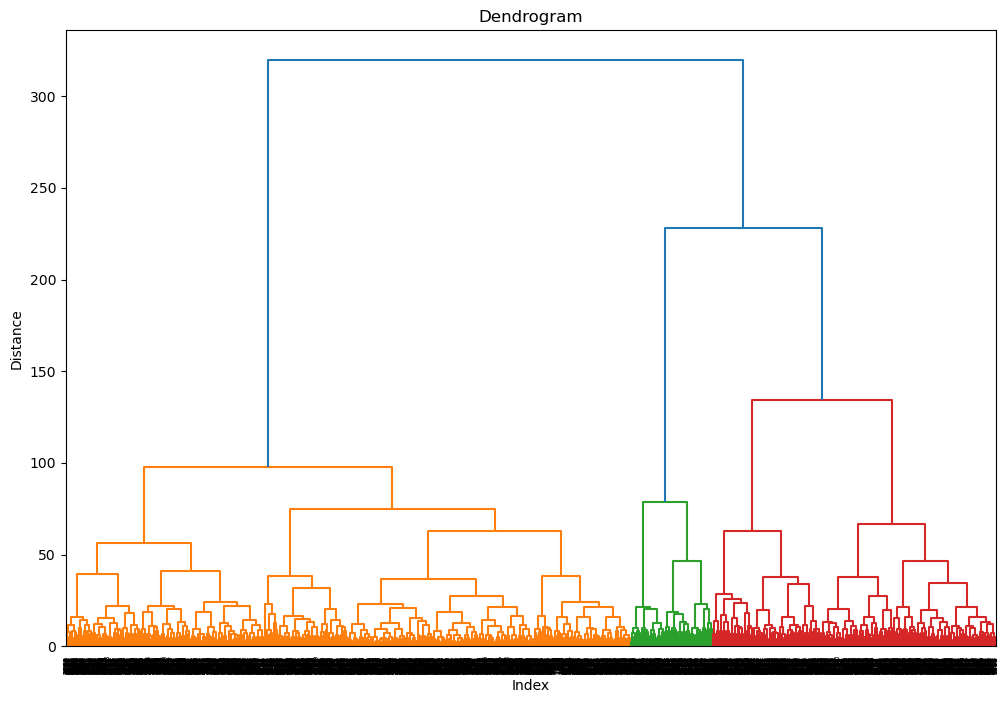

In [12]:
plt.figure(figsize=(12,8))
dendrogram(link)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('Dendrogram');

In [13]:
hier_labels=fcluster(link, t=200,criterion='distance')
hier_labels

array([3, 1, 1, ..., 1, 1, 1], dtype=int32)

In [14]:
df_2['Hier_cluster']=hier_labels

/var/folders/f2/n_0q5zrx2vs2kbb0hxhcx5br0000gn/T/ipykernel_8929/3784295622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Hier_cluster']=hier_labels


In [15]:
df_2

Sex  Birth_year  Birth_month  End_age  Claim_year  Claim_month  \
3       1        1953            8       65        2008            7   
4       2        1960            3       65        2016            1   
5       1        1970            6       65        2003            8   
6       1        1975            3       65        2006           11   
7       1        1965            4       65        2013           12   
...   ...         ...          ...      ...         ...          ...   
5365    2        1959            7       60        1995            2   
5366    1        1947            2       65        1997            9   
5367    1        1947            2       65        2007            8   
5368    1        1952            6       65        2004            7   
5369    2        1959            7       60        1995            2   

      Pct_dis1  Pct_dis2  Pct_dis3  Pct_dis4  ...  Pct_dis16  Pct_dis17  \
3          1.0       1.0       1.0       1.0  ...        0.0        0.0   
4          1.0       0.0       0.0       0.0  ...        0.0        0.0   
5          1.0       1.0       1.0       0.5  ...        0.0        0.0   
6          0.8       0.0       0.0       0.0  ...        0.0        0.0   
7          1.0       1.0       0.8       0.0  ...        0.0        0.0   
...        ...       ...       ...       ...  ...        ...        ...   
5365       0.7       0.7       0.7       0.7  ...        0.0        0.0   
5366       1.0       1.0       1.0       1.0  ...        0.0        0.0   
5367       1.0       1.0       1.0       1.0  ...        0.0        0.0   
5368       0.8       0.0       0.0       0.0  ...        0.0        0.0   
5369       0.7       0.7       0.7       0.7  ...        0.0        0.0   

      Pct_dis18  Pct_dis19  Pct_dis20  Pct_dis21  Duration      Broker  \
3           0.0        0.0        0.0        0.0        10  27531419.0   
4           0.0        0.0        0.0        0.0         1  58473276.0   
5           0.0        0.0        0.0        0.0         4  18022445.0   
6           0.0        0.0        0.0        0.0         1  70581157.0   
7           0.0        0.0        0.0        0.0         3  44579296.0   
...         ...        ...        ...        ...       ...         ...   
5365        0.0        0.0        0.0        0.0        11  55454148.0   
5366        0.0        0.0        0.0        0.0        15  63356854.0   
5367        0.0        0.0        0.0        0.0         5  63356854.0   
5368        0.0        0.0        0.0        0.0         1  54120570.0   
5369        0.0        0.0        0.0        0.0        11  55454148.0   

           Annuity  Hier_cluster  
3     9.785032e+06             3  
4     3.434563e+04             1  
5     6.544400e+03             1  
6     2.563686e+04             1  
7     3.576280e+03             1  
...            ...           ...  
5365  9.061200e+02             1  
5366  1.419268e+09             3  
5367  1.415608e+07             1  
5368  1.030900e+03             1  
5369  2.648640e+03             1  

[4938 rows x 31 columns]

In [16]:
df_2['Hier_cluster'].value_counts()

Hier_cluster
1    3001
3    1503
2     434
Name: count, dtype: int64

In [17]:
df_2[(df_2['Sex']==1) & (df_2['Hier_cluster']==1)]

Sex  Birth_year  Birth_month  End_age  Claim_year  Claim_month  \
5       1        1970            6       65        2003            8   
6       1        1975            3       65        2006           11   
7       1        1965            4       65        2013           12   
9       1        1964            6       65        2013           10   
13      1        1965           11       65        2012            9   
...   ...         ...          ...      ...         ...          ...   
5360    1        1956           11       60        2009           10   
5363    1        1947            2       65        2007            8   
5364    1        1952            6       65        2004            7   
5367    1        1947            2       65        2007            8   
5368    1        1952            6       65        2004            7   

      Pct_dis1  Pct_dis2  Pct_dis3  Pct_dis4  ...  Pct_dis16  Pct_dis17  \
5         1.00      1.00       1.0       0.5  ...        0.0        0.0   
6         0.80      0.00       0.0       0.0  ...        0.0        0.0   
7         1.00      1.00       0.8       0.0  ...        0.0        0.0   
9         1.00      1.00       1.0       0.0  ...        0.0        0.0   
13        0.75      0.25       0.0       0.0  ...        0.0        0.0   
...        ...       ...       ...       ...  ...        ...        ...   
5360      0.80      0.00       0.0       0.0  ...        0.0        0.0   
5363      1.00      1.00       1.0       1.0  ...        0.0        0.0   
5364      0.80      0.00       0.0       0.0  ...        0.0        0.0   
5367      1.00      1.00       1.0       1.0  ...        0.0        0.0   
5368      0.80      0.00       0.0       0.0  ...        0.0        0.0   

      Pct_dis18  Pct_dis19  Pct_dis20  Pct_dis21  Duration      Broker  \
5           0.0        0.0        0.0        0.0         4  18022445.0   
6           0.0        0.0        0.0        0.0         1  70581157.0   
7           0.0        0.0        0.0        0.0         3  44579296.0   
9           0.0        0.0        0.0        0.0         3  32746532.0   
13          0.0        0.0        0.0        0.0         2  51860554.0   
...         ...        ...        ...        ...       ...         ...   
5360        0.0        0.0        0.0        0.0         1  24075015.0   
5363        0.0        0.0        0.0        0.0         5  63356854.0   
5364        0.0        0.0        0.0        0.0         1  54120570.0   
5367        0.0        0.0        0.0        0.0         5  63356854.0   
5368        0.0        0.0        0.0        0.0         1  54120570.0   

          Annuity  Hier_cluster  
5         6544.40             1  
6        25636.86             1  
7         3576.28             1  
9        12166.57             1  
13       28587.27             1  
...           ...           ...  
5360      4393.84             1  
5363      6609.70             1  
5364      1894.42             1  
5367  14156082.00             1  
5368      1030.90             1  

[2029 rows x 31 columns]

In [18]:
df_2

Sex  Birth_year  Birth_month  End_age  Claim_year  Claim_month  \
3       1        1953            8       65        2008            7   
4       2        1960            3       65        2016            1   
5       1        1970            6       65        2003            8   
6       1        1975            3       65        2006           11   
7       1        1965            4       65        2013           12   
...   ...         ...          ...      ...         ...          ...   
5365    2        1959            7       60        1995            2   
5366    1        1947            2       65        1997            9   
5367    1        1947            2       65        2007            8   
5368    1        1952            6       65        2004            7   
5369    2        1959            7       60        1995            2   

      Pct_dis1  Pct_dis2  Pct_dis3  Pct_dis4  ...  Pct_dis16  Pct_dis17  \
3          1.0       1.0       1.0       1.0  ...        0.0        0.0   
4          1.0       0.0       0.0       0.0  ...        0.0        0.0   
5          1.0       1.0       1.0       0.5  ...        0.0        0.0   
6          0.8       0.0       0.0       0.0  ...        0.0        0.0   
7          1.0       1.0       0.8       0.0  ...        0.0        0.0   
...        ...       ...       ...       ...  ...        ...        ...   
5365       0.7       0.7       0.7       0.7  ...        0.0        0.0   
5366       1.0       1.0       1.0       1.0  ...        0.0        0.0   
5367       1.0       1.0       1.0       1.0  ...        0.0        0.0   
5368       0.8       0.0       0.0       0.0  ...        0.0        0.0   
5369       0.7       0.7       0.7       0.7  ...        0.0        0.0   

      Pct_dis18  Pct_dis19  Pct_dis20  Pct_dis21  Duration      Broker  \
3           0.0        0.0        0.0        0.0        10  27531419.0   
4           0.0        0.0        0.0        0.0         1  58473276.0   
5           0.0        0.0        0.0        0.0         4  18022445.0   
6           0.0        0.0        0.0        0.0         1  70581157.0   
7           0.0        0.0        0.0        0.0         3  44579296.0   
...         ...        ...        ...        ...       ...         ...   
5365        0.0        0.0        0.0        0.0        11  55454148.0   
5366        0.0        0.0        0.0        0.0        15  63356854.0   
5367        0.0        0.0        0.0        0.0         5  63356854.0   
5368        0.0        0.0        0.0        0.0         1  54120570.0   
5369        0.0        0.0        0.0        0.0        11  55454148.0   

           Annuity  Hier_cluster  
3     9.785032e+06             3  
4     3.434563e+04             1  
5     6.544400e+03             1  
6     2.563686e+04             1  
7     3.576280e+03             1  
...            ...           ...  
5365  9.061200e+02             1  
5366  1.419268e+09             3  
5367  1.415608e+07             1  
5368  1.030900e+03             1  
5369  2.648640e+03             1  

[4938 rows x 31 columns]

## Implementing DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.7,min_samples=5)
dbscan

DBSCAN(eps=0.7)

In [25]:
db_labels=dbscan.fit_predict(df_final)
db_labels

array([-1, -1, -1, ..., -1, 15, -1])

In [26]:
df_2['DB_cluster']=db_labels

/var/folders/f2/n_0q5zrx2vs2kbb0hxhcx5br0000gn/T/ipykernel_8929/393894974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['DB_cluster']=db_labels


In [27]:
df_2

Sex  Birth_year  Birth_month  End_age  Claim_year  Claim_month  \
3       1        1953            8       65        2008            7   
4       2        1960            3       65        2016            1   
5       1        1970            6       65        2003            8   
6       1        1975            3       65        2006           11   
7       1        1965            4       65        2013           12   
...   ...         ...          ...      ...         ...          ...   
5365    2        1959            7       60        1995            2   
5366    1        1947            2       65        1997            9   
5367    1        1947            2       65        2007            8   
5368    1        1952            6       65        2004            7   
5369    2        1959            7       60        1995            2   

      Pct_dis1  Pct_dis2  Pct_dis3  Pct_dis4  ...  Pct_dis17  Pct_dis18  \
3          1.0       1.0       1.0       1.0  ...        0.0        0.0   
4          1.0       0.0       0.0       0.0  ...        0.0        0.0   
5          1.0       1.0       1.0       0.5  ...        0.0        0.0   
6          0.8       0.0       0.0       0.0  ...        0.0        0.0   
7          1.0       1.0       0.8       0.0  ...        0.0        0.0   
...        ...       ...       ...       ...  ...        ...        ...   
5365       0.7       0.7       0.7       0.7  ...        0.0        0.0   
5366       1.0       1.0       1.0       1.0  ...        0.0        0.0   
5367       1.0       1.0       1.0       1.0  ...        0.0        0.0   
5368       0.8       0.0       0.0       0.0  ...        0.0        0.0   
5369       0.7       0.7       0.7       0.7  ...        0.0        0.0   

      Pct_dis19  Pct_dis20  Pct_dis21  Duration      Broker       Annuity  \
3           0.0        0.0        0.0        10  27531419.0  9.785032e+06   
4           0.0        0.0        0.0         1  58473276.0  3.434563e+04   
5           0.0        0.0        0.0         4  18022445.0  6.544400e+03   
6           0.0        0.0        0.0         1  70581157.0  2.563686e+04   
7           0.0        0.0        0.0         3  44579296.0  3.576280e+03   
...         ...        ...        ...       ...         ...           ...   
5365        0.0        0.0        0.0        11  55454148.0  9.061200e+02   
5366        0.0        0.0        0.0        15  63356854.0  1.419268e+09   
5367        0.0        0.0        0.0         5  63356854.0  1.415608e+07   
5368        0.0        0.0        0.0         1  54120570.0  1.030900e+03   
5369        0.0        0.0        0.0        11  55454148.0  2.648640e+03   

      Hier_cluster  DB_cluster  
3                3          -1  
4                1          -1  
5                1          -1  
6                1          -1  
7                1          -1  
...            ...         ...  
5365             1          -1  
5366             3          -1  
5367             1          -1  
5368             1          15  
5369             1          -1  

[4938 rows x 32 columns]

In [28]:
df_2['DB_cluster'].value_counts()

DB_cluster
-1     4755
 4       17
 7       16
 6       12
 3       11
 10      10
 15      10
 8        9
 13       8
 17       8
 12       8
 0        8
 11       7
 16       6
 2        6
 14       5
 22       5
 23       5
 19       5
 9        5
 5        5
 18       5
 1        5
 20       4
 21       3
Name: count, dtype: int64